# SMS Machine Learning Model

# 1. Importing the required libraries and functions

In [61]:
#importing the function to avoid unnecessary alerts
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)
#importing all the required libraries for all functions
import numpy as num
import pandas as pan
import sys as s
import sklearn as skl
import matplotlib.pyplot as pt
import seaborn as sb
import string as s

# 2. Acquiring the SMS dataset

In [62]:
#loading our spam information set 
X=pan.read_csv('Smsspam.csv', encoding='ISO-8859-1')
X.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
X.columns = ['Category', 'Content']

In [63]:
#showing some information about the data
print("\n---------------------The Header part of the data------------------------------------\n")
X.head()


---------------------The Header part of the data------------------------------------



,Category,Content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [64]:
#See how the class has been divided
ClassDis=X['Category']
size=len(X.index)

print("\n-----------------------------------Showing the Class Division setup -----------------------\n")
print("Total Dataset Values: {}".format(size))
print(ClassDis.value_counts())
print(ClassDis.value_counts() / size * 100.0)


-----------------------------------Showing the Class Division setup -----------------------

Total Dataset Values: 5572
ham     4825
spam     747
Name: Category, dtype: int64
ham     86.593683
spam    13.406317
Name: Category, dtype: float64


# 3. Exploring and analysing the data

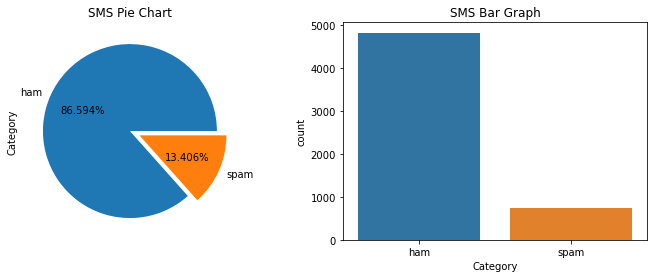

In [65]:
#Class division visualized by bar graph and pie chart
b, XY_Ax=pt.subplots(1,2, figsize=(12,4))
ClassDis.value_counts().plot.pie(explode=[0,0.12],autopct='%1.3f%%',ax=XY_Ax[0]).set_title("SMS Pie Chart")
sb.countplot('Category',data=X).set_title("SMS Bar Graph")
pt.show()

In [66]:
# checking out the data given
X.groupby('Category').describe()

Content                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [67]:
# create new message length feature and add it as another column
X['Msg_Length'] = X['Content'].apply(len)
X.head()

,Category,Content,Msg_Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [68]:
#Message length described
X.Msg_Length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: Msg_Length, dtype: float64

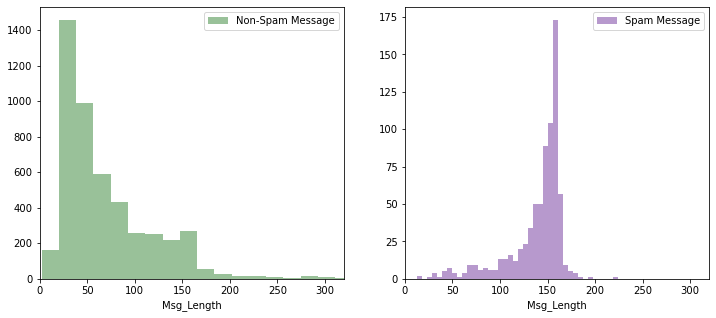

In [69]:
#Message length of spam and non-spam visulaized by bar graph
b, XY_Ax = pt.subplots(1, 2, figsize=(12, 5), sharex=True)
pt.xlim(0, 320)
sb.distplot(X.Msg_Length[X.Category=='ham'], color='darkgreen', label='Non-Spam Message', kde=False, ax=XY_Ax[0]);
sb.distplot(X.Msg_Length[X.Category=='spam'], color='indigo', label='Spam Message', kde=False, ax=XY_Ax[1]);
XY_Ax[0].legend();
XY_Ax[1].legend();

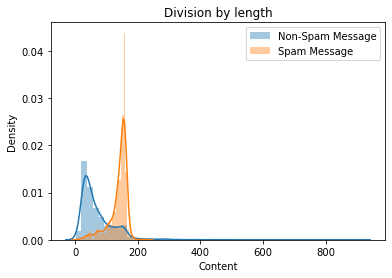

In [70]:
#Spam and non-spam message divided by length visulaized by graph
NormalMsg =X[X['Category'] == 'ham']['Content'].str.len()
sb.distplot(NormalMsg, label='Non-Spam Message')
SpamMsg = X[X['Category'] == 'spam']['Content'].str.len()
sb.distplot(SpamMsg, label='Spam Message')
pt.title('Division by length')
pt.legend()
pt.savefig('Length Division.png')

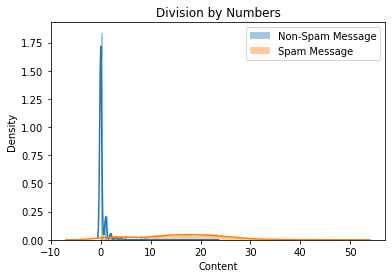

In [71]:
#Spam and non-spam message divided by numbers visulaized by graph
NormalMsg1 = X[X['Category'] == 'ham']['Content'].str.replace(r'\D+', '').str.len()
sb.distplot(NormalMsg1, label='Non-Spam Message')
SpamMsg1 = X[X['Category'] == 'spam']['Content'].str.replace(r'\D+', '').str.len()
sb.distplot(SpamMsg1, label='Spam Message')
pt.title('Division by Numbers')
pt.legend()
pt.savefig('text division by nos.png')

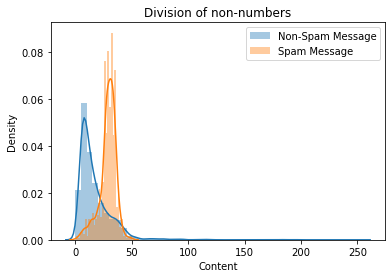

In [72]:
#Spam and non-spam message divided by non-numbers visulaized by graph
NormalMsg2 = X[X['Category'] == 'ham']['Content'].str.replace(r'\w+', '').str.len()
sb.distplot(NormalMsg2, label='Non-Spam Message')
SpamMsg2 = X[X['Category'] == 'spam']['Content'].str.replace(r'\w+', '').str.len()
sb.distplot(SpamMsg2, label='Spam Message')
pt.title('Division of non-numbers')
pt.legend()
pt.savefig('text division by non-numbers.png')

# 4. Data Cleaning

In [73]:
#Converting class labels to binary values such as ham=0,Spam=1
from sklearn.preprocessing import LabelEncoder

encode=LabelEncoder()
E = encode.fit_transform(X['Category'])
X["Label"]=E
X.head()

,Category,Content,Msg_Length,Label
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


In [74]:
#New column "Refined text" created to see changes
X["Refined text"] = X["Content"].copy()
X.head()

,Category,Content,Msg_Length,Label,Refined text
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,29,0,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,49,0,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,"Nah I don't think he goes to usf, he lives aro..."


In [75]:
# Getting rid of all unwanted spaces,tabs..etc and a space is placed in all number places
X["Refined text"] = X["Refined text"].str.replace(r'\d+(\.\d+)?', '')
X["Refined text"] = X["Refined text"].str.replace(r'[^\w\d\s]', ' ')
X["Refined text"] = X["Refined text"].str.replace(r'\s+', ' ')
X["Refined text"] = X["Refined text"].str.replace(r'^\s+|\s+?$', '')

# Substituting URL addresses with 'add'
X["Refined text"] = X["Refined text"].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'add')

# Substituting currency symbols with 'currency'
X["Refined text"] = X["Refined text"].str.replace(r'£|\$', 'currency')


# Changing all capital words to small word
X["Refined text"] = X["Refined text"].str.lower()

# Getting rid of 1 term words
X["Refined text"] = X["Refined text"].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
X.head()

,Category,Content,Msg_Length,Label,Refined text
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,29,0,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,free entry in wkly comp to win fa cup final tk...
3,ham,U dun say so early hor... U c already then say...,49,0,dun say so early hor already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,nah don think he goes to usf he lives around h...


In [76]:
# Removing punctuation marks like . , ! , ? , : ..etc
s.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# 5. Data Preprocessing

In [77]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer as ss
from nltk.corpus import stopwords
#gives a specific set of words 
Sw= (stopwords.words('english')) 
Sw[0:10] 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [78]:
#Removing terms using the stemming process
processStem = ss("english")
def txtproc(msg):   
    msg = msg.translate(str.maketrans('','', s.punctuation))
    ws = [processStem.stem(word) for word in msg.split() if word.lower() not in stopwords.words("english")]
    return " ".join(ws)
X["Refined text"] = X["Refined text"].apply(txtproc)

In [79]:
#showing the old message and new messages transformed
print("Unprocessed 1st Message:\t", X['Content'][1])
print("Refined Text Message :\t\t", X['Refined text'][1], '\n')

print("Unprocessed 4th Message:\t", X['Content'][4])
print("Refined Text Message :\t\t", X['Refined text'][4], '\n')

print("Unprocessed 400th Message:\t", X['Content'][400])
print("Refined Text Message :\t\t", X['Refined text'][400], '\n')

print("Unprocessed 14th Message:\t", X['Content'][14])
print("Refined Text Message :\t\t", X['Refined text'][14], '\n')

print("Unprocessed 5530th Message:\t", X['Content'][5530])
print("Refined Text Message :\t\t", X['Refined text'][5530], '\n')

Unprocessed 1st Message:	 Ok lar... Joking wif u oni...
Refined Text Message :		 ok lar joke wif oni 

Unprocessed 4th Message:	 Nah I don't think he goes to usf, he lives around here though
Refined Text Message :		 nah think goe usf live around though 

Unprocessed 400th Message:	 FREE RINGTONE text FIRST to 87131 for a poly or text GET to 87131 for a true tone! Help? 0845 2814032 16 after 1st free, tones are 3xå£150pw to eå£nd txt stop
Refined Text Message :		 free rington text first poli text get true tone help st free tone xå pw eå nd txt stop 

Unprocessed 14th Message:	 I HAVE A DATE ON SUNDAY WITH WILL!!
Refined Text Message :		 date sunday 

Unprocessed 5530th Message:	 I think that tantrum's finished so yeah I'll be by at some point
Refined Text Message :		 think tantrum finish yeah point 



In [80]:
#token are created with messages refined
from nltk import word_tokenize,sent_tokenize
X['Toklist'] = X['Refined text'].map(lambda w: nltk.tokenize.word_tokenize(w))

In [81]:
# new column "Refined Msg_length" is created to show the changes
X['Refined Msg_length'] = X['Refined text'].apply(len)
X.head()

,Category,Content,Msg_Length,Label,Refined text,Toklist,Refined Msg_length
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,go jurong point crazi avail bugi great world l...,"[go, jurong, point, crazi, avail, bugi, great,...",72
1,ham,Ok lar... Joking wif u oni...,29,0,ok lar joke wif oni,"[ok, lar, joke, wif, oni]",19
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,free entri wkli comp win fa cup final tkts st ...,"[free, entri, wkli, comp, win, fa, cup, final,...",98
3,ham,U dun say so early hor... U c already then say...,49,0,dun say earli hor alreadi say,"[dun, say, earli, hor, alreadi, say]",29
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,nah think goe usf live around though,"[nah, think, goe, usf, live, around, though]",36


In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


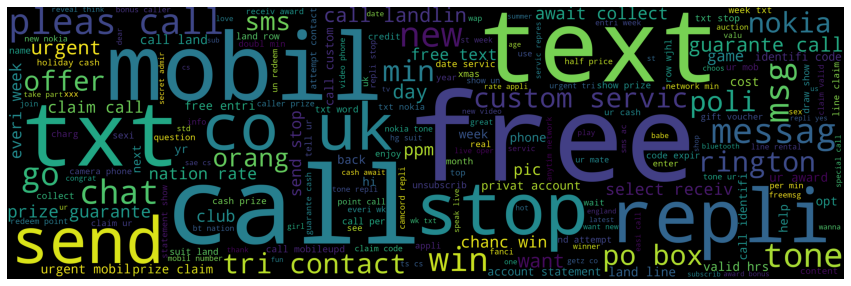

In [82]:
#Using Wordcloud to visualise Spam words
from wordcloud import WordCloud as wc
spamtxt = ' '.join(list(X[X['Category'] == "spam"]["Refined text"]))
spamset = wc(height = 1300, width=4000).generate(spamtxt)
pt.figure(figsize=(15,15))
pt.imshow(spamset)
pt.axis('off')
pt.show()

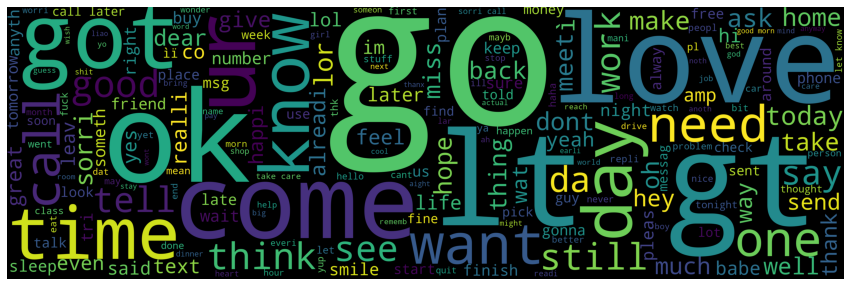

In [83]:
#Using Wordcloud to visualise Non-spam words
from wordcloud import WordCloud as wc
NonSpamtxt = ' '.join(list(X[X['Category'] == "ham"]["Refined text"]))
NonSpamset = wc(height = 1300, width=4000).generate(NonSpamtxt)
pt.figure(figsize=(15,15))
pt.imshow(NonSpamset)
pt.axis('off')
pt.show()

In [84]:
#getting most used 20 terms in spam and non-spam messages
from collections import Counter
NonSpamset = Counter(" ".join(X[X['Category']=='ham']["Refined text"]).split()).most_common(20)
NonSpamsetdata = pan.DataFrame.from_dict(NonSpamset)
NonSpamsetdata= NonSpamsetdata.rename(columns={0: "Non-spam text", 1 : "count"})

spamset = Counter(" ".join(X[X['Category']=='spam']["Refined text"]).split()).most_common(20)
Spamsetdata = pan.DataFrame.from_dict(spamset)
Spamsetdata = Spamsetdata.rename(columns={0: "Spam text", 1 : "count_"})


In [85]:
print(NonSpamsetdata[0:20])
print('\n\n',Spamsetdata[0:20])

   Non-spam text  count
0             go    421
1            get    366
2             gt    318
3             lt    316
4           call    298
5           come    296
6             ok    287
7           love    252
8           know    248
9            day    247
10          like    246
11            ur    241
12          good    234
13           got    233
14          time    233
15          want    213
16          need    178
17           one    174
18          home    165
19           lor    162


    Spam text  count_
0       call     377
1       free     226
2        txt     170
3       text     146
4         ur     144
5      mobil     140
6       stop     124
7      claim     115
8      repli     113
9        www      98
10     prize      95
11      week      93
12       get      90
13      tone      86
14       min      84
15        uk      77
16      cash      76
17     nokia      74
18    servic      73
19      send      72


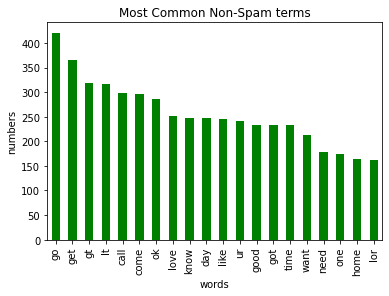

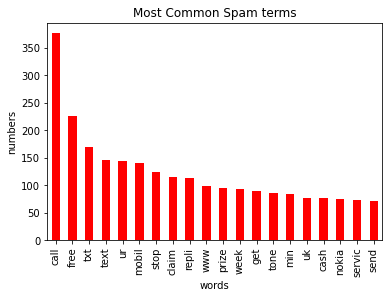

In [86]:
NonSpamsetdata.plot.bar(legend = False, color = 'green')
Yaxis = num.arange(len(NonSpamsetdata["Non-spam text"]))
pt.xticks(Yaxis, NonSpamsetdata["Non-spam text"])
pt.title('Most Common Non-Spam terms')
pt.xlabel('words')
pt.ylabel('numbers')
pt.show()

Spamsetdata.plot.bar(legend = False, color = 'red')
Yaxis = num.arange(len(Spamsetdata["Spam text"]))
pt.xticks(Yaxis,Spamsetdata["Spam text"])
pt.title('Most Common Spam terms')
pt.xlabel('words')
pt.ylabel('numbers')
pt.show()

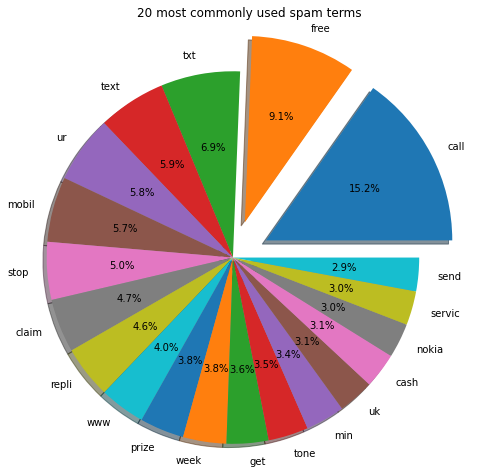

In [87]:
#showing the percentage of each word used
explode = (0.2, 0.2, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0) 
f, Axis = pt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
pt.pie(Spamsetdata['count_'],
       labels = Spamsetdata["Spam text"], 
       shadow = True,
       autopct='%1.1f%%', 
       explode = explode)
pt.title("20 most commonly used spam terms")
pt.axis('equal')
pt.show()

In [88]:
pip install mlxtend

In [97]:
#A copy of the dataset is created
Wholedataset=X.copy()
#getting rid of unwanted columns
Wholedataset.drop(["Refined text", "Msg_Length", "Toklist", "Refined Msg_length", "Category"], axis=1, inplace=True)
print(Wholedataset.count())

Content    5572
Label      5572
dtype: int64


# 6.Splitting the dataset into training and testing data 

In [98]:
from sklearn import feature_extraction, model_selection, naive_bayes, svm
from sklearn import metrics as m
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as CT
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report as ClassRep
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import learning_curve
from sklearn.utils import resample
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

TrainA, TestA, TrainB, TestB = train_test_split(Wholedataset['Content'],
                                                    Wholedataset['Label'],
                                                    test_size=0.3,
                                                    random_state=101)

## 6a. Balancing the Dataset

In [99]:
# Joining TrainA and TrainB column to create a whole dataset consisting of Content and label columns
TrainANewset=pan.concat([TrainA, TrainB], axis=1)

NonSpam=TrainANewset[TrainANewset['Label']==0] 

Spam=TrainANewset[TrainANewset['Label']==1] 

#Upgrading the dataset
SpamUpgrade = resample(Spam,replace=True,n_samples=3350,random_state=101) 

# joining upgraded spam messages with non-spam messages for a unified distribution
Upgraded = pan.concat([NonSpam, SpamUpgrade])

TrainA=Upgraded['Content']
TrainB=Upgraded['Label']

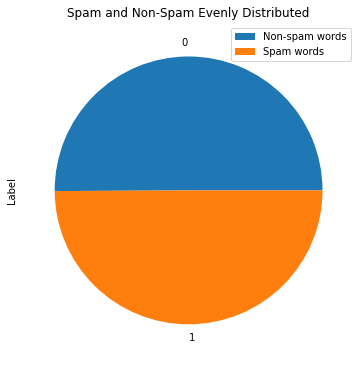

In [100]:
#Visualizing the new balanced dataset

Upgraded["Label"].value_counts().plot(kind = 'pie', 
                                          figsize = (6, 7))
                                          

pt.title('Spam and Non-Spam Evenly Distributed')
pt.legend(["Non-spam words", "Spam words"])
pt.show()

## 6b.Vectorization process using TF-IDF Vectorizer

In [101]:
# Train data is transformed using TFIDF 
Tfvecto = TfidfVectorizer(stop_words = 'english', use_idf = True, lowercase = True, strip_accents='ascii')
TrainA_Tfvecto = Tfvecto.fit_transform(TrainA) 
TestA_Tfvecto = Tfvecto.transform(TestA) 
print(TrainA_Tfvecto.shape)

(6711, 7025)


In [102]:
print(TrainA_Tfvecto.shape)
print(TestA_Tfvecto.shape)

(6711, 7025)
(1672, 7025)


In [103]:
t = TrainA_Tfvecto.toarray()
print(TrainA.iloc[3],'\n')
print(TrainA.iloc[300],'\n')
print(TrainA.iloc[3000],'\n')

I cant pick the phone right now. Pls send a message 

Ujhhhhhhh computer shipped out with address to sandiago and parantella lane. Wtf. Poop. 

Princess, i like to make love  &lt;#&gt;  times per night. Hope thats not a problem! 



In [104]:
# Tfidf transformation
t = TrainA_Tfvecto.toarray()
print(Tfvecto.inverse_transform(t[3]),'\n')
print(Tfvecto.inverse_transform(t[300]),'\n')
print(Tfvecto.inverse_transform(t[3000]),'\n')

[array(['message', 'phone', 'pick', 'pls', 'right', 'send'], dtype='<U34')] 

[array(['address', 'computer', 'lane', 'parantella', 'poop', 'sandiago',
       'shipped', 'ujhhhhhhh', 'wtf'], dtype='<U34')] 

[array(['gt', 'hope', 'like', 'love', 'lt', 'make', 'night', 'princess',
       'problem', 'thats', 'times'], dtype='<U34')] 



# 7. Comparison of Various ML Classifiers

## 7.1 Naive Bayes

In [105]:
# Model training and prediction
NBModel = MultinomialNB()
NBModel.fit(TrainA_Tfvecto, TrainB)

MultinomialNB()

In [106]:
NBPred = NBModel.predict(TestA_Tfvecto)
accuracy1=m.accuracy_score(TestB, NBPred)*100
print(accuracy1)

97.06937799043062


In [107]:
print(ClassRep(TestB, NBPred))

pan.DataFrame(
   CT(TestB, NBPred),
    index = [['ActualData', 'ActualData',], ['Ham', 'Spam']],
    columns = [['PredictedData', 'PredictedData'], ['Ham', 'Spam']])


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1464
           1       0.84      0.95      0.89       208

    accuracy                           0.97      1672
   macro avg       0.92      0.96      0.94      1672
weighted avg       0.97      0.97      0.97      1672



PredictedData     
                          Ham Spam
ActualData Ham           1426   38
           Spam            11  197

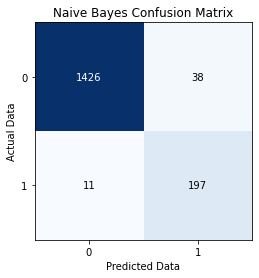

In [108]:
NB_Conmat = CT(TestB, NBPred)

f1, Axis1 = plot_confusion_matrix(conf_mat=NB_Conmat ,figsize=(8, 4))
pt.title("Naive Bayes Confusion Matrix")
pt.xlabel("Predicted Data")
pt.ylabel("Actual Data")
pt.show()

Naive Bayes Area Under Curve is : 0.9605795502311896


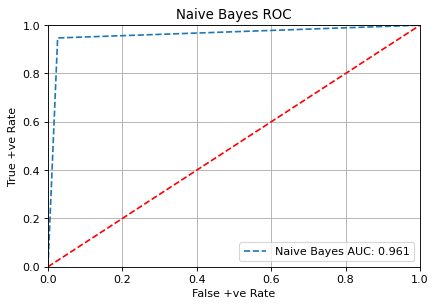

In [109]:
fpr1, tpr1, thresholds1 = m.roc_curve(TestB, NBPred, pos_label=1)
NB_Curve = m.auc(fpr1, tpr1)
fig1=pt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')

print("Naive Bayes Area Under Curve is : {0}".format(NB_Curve))

pt.title('Naive Bayes ROC')
pt.plot(fpr1, tpr1,linestyle='--', label='Naive Bayes AUC: %0.3f' %NB_Curve)
#pt.plot(fpr, tpr,color='red','b', label = 'AUC = %0.3f' % NB_Curve)
pt.legend(loc = 'lower right')
pt.plot([0, 1], [0, 1],'r--')
pt.xlim([0, 1])
pt.ylim([0, 1])
pt.ylabel('True +ve Rate')
pt.xlabel('False +ve Rate')
pt.savefig('NB ROC')
pt.grid()
pt.show()

## 7.2 Logistic Regression

In [110]:
# Training and predicting spam messages using Logit Regression
LRModel = LogisticRegression()
LRModel.fit(TrainA_Tfvecto, TrainB)

LogisticRegression()

In [111]:
LRPred = LRModel.predict(TestA_Tfvecto)
accuracy2=m.accuracy_score(TestB, LRPred)*100
print(accuracy2)

98.56459330143541


In [112]:
print(ClassRep(TestB, LRPred))

pan.DataFrame(
   CT(TestB, LRPred),
    index = [['ActualData', 'ActualData',], ['Ham', 'Spam']],
    columns = [['PredictedData', 'PredictedData'], ['Ham', 'Spam']])


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1464
           1       0.96      0.92      0.94       208

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



PredictedData     
                          Ham Spam
ActualData Ham           1457    7
           Spam            17  191

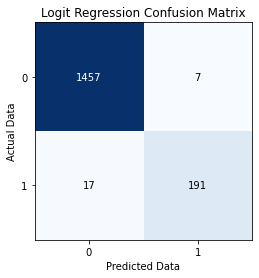

In [113]:
LR_ConMat = CT(TestB, LRPred)
f2,Axis2 = plot_confusion_matrix(conf_mat=LR_ConMat ,  figsize=(8, 4))
pt.title("Logit Regression Confusion Matrix")
pt.xlabel("Predicted Data")
pt.ylabel("Actual Data")
pt.show()

Logistic Regression Area Under Curve is : 0.9567439050021018


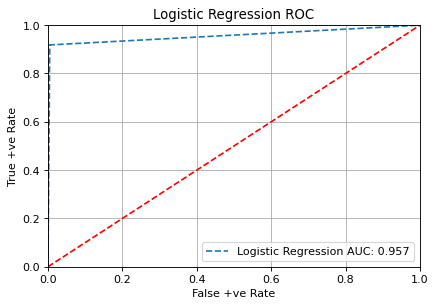

In [114]:
fpr2, tpr2, thresholds2 = m.roc_curve(TestB, LRPred, pos_label=1)
LR_Curve = m.auc(fpr2, tpr2)
fig2=pt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')

print("Logistic Regression Area Under Curve is : {0}".format(LR_Curve))

pt.title('Logistic Regression ROC')
pt.plot(fpr2, tpr2,linestyle='--', label='Logistic Regression AUC: %0.3f' %LR_Curve)
pt.legend(loc = 'lower right')
pt.plot([0, 1], [0, 1],'r--')
pt.xlim([0, 1])
pt.ylim([0, 1])
pt.ylabel('True +ve Rate')
pt.xlabel('False +ve Rate')
pt.savefig('LR ROC')
pt.grid()
pt.show()

## 7.3 Stochastic Gradient Descent Classifier

In [115]:
SGDModel = SGDClassifier(max_iter = 100)
SGDModel.fit(TrainA_Tfvecto, TrainB)

SGDClassifier(max_iter=100)

In [116]:
SGDPred = SGDModel.predict(TestA_Tfvecto)
accuracy3=m.accuracy_score(TestB, SGDPred)*100
print(accuracy3)

98.68421052631578


In [117]:
print(ClassRep(TestB, SGDPred))

pan.DataFrame(
   CT(TestB, SGDPred),
    index = [['ActualData', 'ActualData',], ['Ham', 'Spam']],
    columns = [['PredictedData', 'PredictedData'], ['Ham', 'Spam']])

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1464
           1       0.98      0.91      0.95       208

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



PredictedData     
                          Ham Spam
ActualData Ham           1460    4
           Spam            18  190

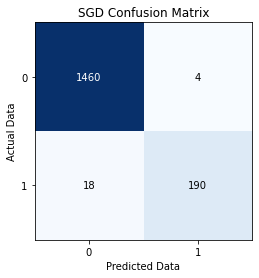

In [118]:
SGD_ConMat = CT(TestB, SGDPred)
f3, Axis3 = plot_confusion_matrix(conf_mat=SGD_ConMat ,  figsize=(8, 4))
pt.title("SGD Confusion Matrix")
pt.xlabel("Predicted Data")
pt.ylabel("Actual Data")
pt.show()

SGD Classifier Area Under Curve is : 0.9553646490121899


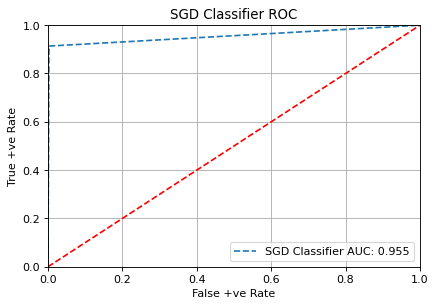

In [119]:
fpr3, tpr3, thresholds3 = m.roc_curve(TestB, SGDPred, pos_label=1)
SGD_Curve = m.auc(fpr3, tpr3)
fig3=pt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')

print("SGD Classifier Area Under Curve is : {0}".format(SGD_Curve))

pt.title('SGD Classifier ROC')
pt.plot(fpr3, tpr3,linestyle='--', label='SGD Classifier AUC: %0.3f' %SGD_Curve)
pt.legend(loc = 'lower right')
pt.plot([0, 1], [0, 1],'r--')
pt.xlim([0, 1])
pt.ylim([0, 1])
pt.ylabel('True +ve Rate')
pt.xlabel('False +ve Rate')
pt.savefig('SGD ROC')
pt.grid()
pt.show()

## 7.4 KNN Neighbors

In [120]:
KNNModel = KNeighborsClassifier()
KNNModel.fit(TrainA_Tfvecto, TrainB)

KNeighborsClassifier()

In [121]:
KNNPred = KNNModel.predict(TestA_Tfvecto)
accuracy4=m.accuracy_score(TestB, KNNPred)*100
print(accuracy4)

94.97607655502392


In [122]:
print(ClassRep(TestB, KNNPred))

pan.DataFrame(
   CT(TestB, KNNPred),
    index = [['ActualData', 'ActualData',], ['Ham', 'Spam']],
    columns = [['PredictedData', 'PredictedData'], ['Ham', 'Spam']])

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1464
           1       1.00      0.60      0.75       208

    accuracy                           0.95      1672
   macro avg       0.97      0.80      0.86      1672
weighted avg       0.95      0.95      0.94      1672



PredictedData     
                          Ham Spam
ActualData Ham           1464    0
           Spam            84  124

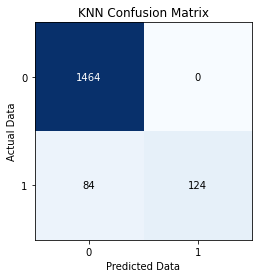

In [123]:
KNN_ConMat = CT(TestB, KNNPred)
f4, Axis4 = plot_confusion_matrix(conf_mat=KNN_ConMat ,  figsize=(8, 4))
pt.title("KNN Confusion Matrix")
pt.xlabel("Predicted Data")
pt.ylabel("Actual Data")
pt.show()

KNN Classifier Area Under Curve is : 0.7980769230769231


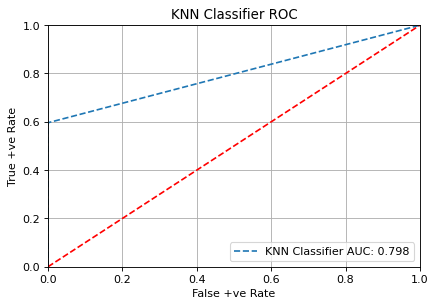

In [124]:
fpr4, tpr4, thresholds4 = m.roc_curve(TestB, KNNPred, pos_label=1)
KNN_Curve = m.auc(fpr4, tpr4)
fig4=pt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')

print("KNN Classifier Area Under Curve is : {0}".format(KNN_Curve))

pt.title('KNN Classifier ROC')
pt.plot(fpr4, tpr4,linestyle='--', label='KNN Classifier AUC: %0.3f' %KNN_Curve)
pt.legend(loc = 'lower right')
pt.plot([0, 1], [0, 1],'r--')
pt.xlim([0, 1])
pt.ylim([0, 1])
pt.ylabel('True +ve Rate')
pt.xlabel('False +ve Rate')
pt.savefig('KNN ROC')
pt.grid()
pt.show()

## 7.5 Random Decision Forest

In [125]:
RDFModel = RandomForestClassifier()
RDFModel.fit(TrainA_Tfvecto, TrainB)

RandomForestClassifier()

In [126]:
RDFPred = RDFModel.predict(TestA_Tfvecto)
accuracy5=m.accuracy_score(TestB, RDFPred)*100
print(accuracy5)

98.08612440191388


In [127]:
print(ClassRep(TestB, RDFPred))
pan.DataFrame(
   CT(TestB, RDFPred),
    index = [['ActualData', 'ActualData',], ['Ham', 'Spam']],
    columns = [['PredictedData', 'PredictedData'], ['Ham', 'Spam']])


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1464
           1       0.98      0.86      0.92       208

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



PredictedData     
                          Ham Spam
ActualData Ham           1461    3
           Spam            29  179

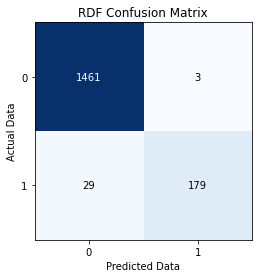

In [128]:
RDF_ConMat = CT(TestB, RDFPred)
f5, Axis5 = plot_confusion_matrix(conf_mat=RDF_ConMat ,  figsize=(8, 4))
pt.title("RDF Confusion Matrix")
pt.xlabel("Predicted Data")
pt.ylabel("Actual Data")
pt.show()

RDF Classifier Area Under Curve is : 0.9292638713745272


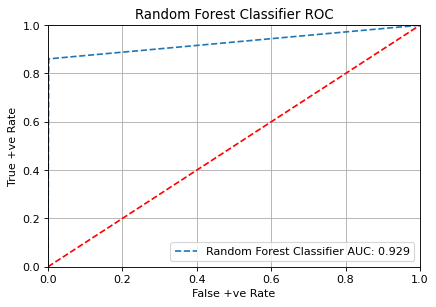

In [129]:
fpr5, tpr5, thresholds5 = m.roc_curve(TestB, RDFPred, pos_label=1)
RDF_Curve = m.auc(fpr5, tpr5)
fig5=pt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')

print("RDF Classifier Area Under Curve is : {0}".format(RDF_Curve))

pt.title('Random Forest Classifier ROC')
pt.plot(fpr5, tpr5,linestyle='--', label='Random Forest Classifier AUC: %0.3f' %RDF_Curve)
pt.legend(loc = 'lower right')
pt.plot([0, 1], [0, 1],'r--')
pt.xlim([0, 1])
pt.ylim([0, 1])
pt.ylabel('True +ve Rate')
pt.xlabel('False +ve Rate')
pt.savefig('RDF ROC')
pt.grid()
pt.show()

## 7.6 Decision Tree Learning

In [130]:
DTModel = DecisionTreeClassifier()
DTModel.fit(TrainA_Tfvecto, TrainB)

DecisionTreeClassifier()

In [131]:
DTPred = DTModel.predict(TestA_Tfvecto)
accuracy6=m.accuracy_score(TestB, DTPred)*100
print(accuracy6)

95.81339712918661


In [132]:
print(ClassRep(TestB, DTPred))

pan.DataFrame(
   CT(TestB, DTPred),
    index = [['ActualData', 'ActualData',], ['Ham', 'Spam']],
    columns = [['PredictedData', 'PredictedData'], ['Ham', 'Spam']])

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1464
           1       0.82      0.85      0.83       208

    accuracy                           0.96      1672
   macro avg       0.90      0.91      0.91      1672
weighted avg       0.96      0.96      0.96      1672



PredictedData     
                          Ham Spam
ActualData Ham           1425   39
           Spam            31  177

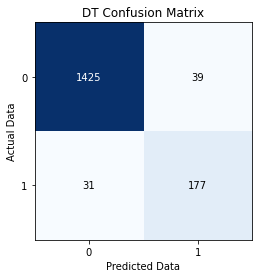

In [133]:
DT_ConMat = CT(TestB, DTPred)
f6, Axis6 = plot_confusion_matrix(conf_mat=DT_ConMat ,  figsize=(8, 4))
pt.title("DT Confusion Matrix")
pt.xlabel("Predicted Data")
pt.ylabel("Actual Data")
pt.show()

DT Classifier Area Under Curve is : 0.9121610970996216


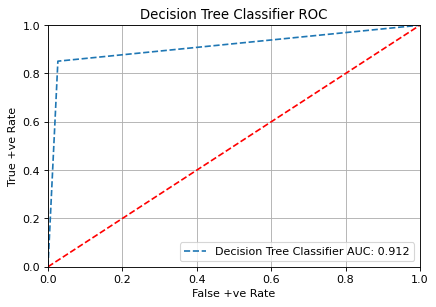

In [134]:
fpr6, tpr6, thresholds6 = m.roc_curve(TestB, DTPred, pos_label=1)
DT_Curve = m.auc(fpr6, tpr6)
fig6=pt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')

print("DT Classifier Area Under Curve is : {0}".format(DT_Curve))

pt.title('Decision Tree Classifier ROC')
pt.plot(fpr6, tpr6,linestyle='--', label='Decision Tree Classifier AUC: %0.3f' %DT_Curve)
pt.legend(loc = 'lower right')
pt.plot([0, 1], [0, 1],'r--')
pt.xlim([0, 1])
pt.ylim([0, 1])
pt.ylabel('True +ve Rate')
pt.xlabel('False +ve Rate')
pt.savefig('DT ROC')
pt.grid()
pt.show()

## 7.7 Support Vector Machine Linear

In [135]:
SVMModel = SVC(kernel = 'linear')
SVMModel.fit(TrainA_Tfvecto, TrainB)

SVC(kernel='linear')

In [136]:
SVMPred = SVMModel.predict(TestA_Tfvecto)
accuracy7=m.accuracy_score(TestB, SVMPred)*100
print(accuracy7)

98.56459330143541


In [137]:
print(ClassRep(TestB, SVMPred))

pan.DataFrame(
   CT(TestB, SVMPred),
    index = [['ActualData', 'ActualData',], ['Ham', 'Spam']],
    columns = [['PredictedData', 'PredictedData'], ['Ham', 'Spam']])

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1464
           1       0.97      0.91      0.94       208

    accuracy                           0.99      1672
   macro avg       0.98      0.95      0.97      1672
weighted avg       0.99      0.99      0.99      1672



PredictedData     
                          Ham Spam
ActualData Ham           1459    5
           Spam            19  189

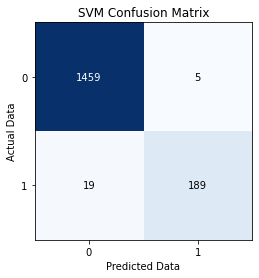

In [138]:
SVM_ConMat = CT(TestB, SVMPred)
f7, Axis7 = plot_confusion_matrix(conf_mat=SVM_ConMat ,  figsize=(8, 4))
pt.title("SVM Confusion Matrix")
pt.xlabel("Predicted Data")
pt.ylabel("Actual Data")
pt.show()

SVM Classifier Area Under Curve is : 0.9526192728036991


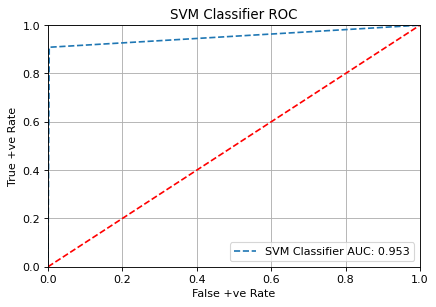

In [139]:
fpr7, tpr7, thresholds7 = m.roc_curve(TestB, SVMPred, pos_label=1)
SVM_Curve = m.auc(fpr7, tpr7)
fig7=pt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')

print("SVM Classifier Area Under Curve is : {0}".format(SVM_Curve))

pt.title('SVM Classifier ROC')
pt.plot(fpr7, tpr7,linestyle='--', label='SVM Classifier AUC: %0.3f' %SVM_Curve)
pt.legend(loc = 'lower right')
pt.plot([0, 1], [0, 1],'r--')
pt.xlim([0, 1])
pt.ylim([0, 1])
pt.ylabel('True +ve Rate')
pt.xlabel('False +ve Rate')
pt.savefig('SVM ROC')
pt.grid()
pt.show()

# 8.Evaluating the Performance of the Models

## 8.1 Performance by Accuracy

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

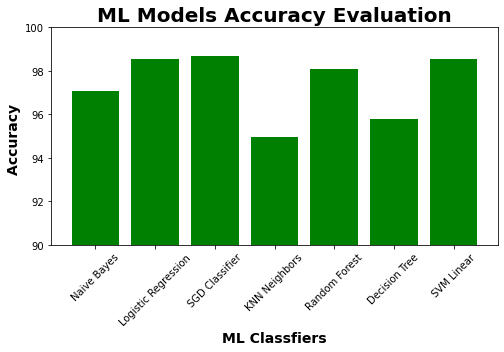

In [141]:
#Displaying the Accuracies of ML Models in bar graph
bar_width = 0.3
pt.figure(figsize=(8,4))

pt.ylim((90,100))
MLClass_acc=["Naive Bayes","Logistic Regression","SGD Classifier", "KNN Neighbors", "Random Forest", "Decision Tree","SVM Linear"]
data_acc=[accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7]
pt.bar(x=MLClass_acc,height=data_acc,align='center', color='green')
pt.xlabel('ML Classfiers',fontsize=14,fontweight='bold')
pt.ylabel('Accuracy ',fontsize=14,fontweight='bold')
pt.title(' ML Models Accuracy Evaluation ',fontsize=20,fontweight='bold')
pt.xticks(rotation=45)

## 8.2 Performance by ROC-AUC

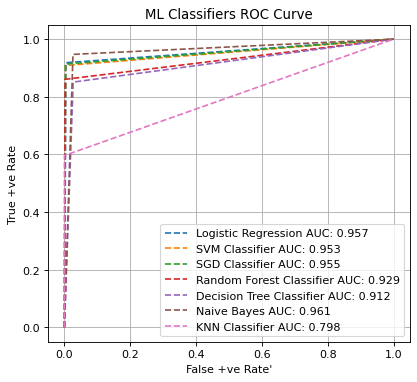

In [142]:
#Comparing all the ML Models in terms of ROC-AUC
figFinal=pt.figure(figsize=(10, 9), dpi= 80, facecolor='w', edgecolor='k')
pt.subplot(2,2,1)

pt.plot(fpr2, tpr2,linestyle='--', label='Logistic Regression AUC: %0.3f' %LR_Curve)
pt.plot(fpr7, tpr7,linestyle='--', label='SVM Classifier AUC: %0.3f' %SVM_Curve)
pt.plot(fpr3, tpr3,linestyle='--', label='SGD Classifier AUC: %0.3f' %SGD_Curve)
pt.plot(fpr5, tpr5,linestyle='--', label='Random Forest Classifier AUC: %0.3f' %RDF_Curve)
pt.plot(fpr6, tpr6,linestyle='--', label='Decision Tree Classifier AUC: %0.3f' %DT_Curve)
pt.plot(fpr1, tpr1,linestyle='--', label='Naive Bayes AUC: %0.3f' %NB_Curve)
pt.plot(fpr4, tpr4,linestyle='--', label='KNN Classifier AUC: %0.3f' %KNN_Curve)

pt.title("ML Classifiers ROC Curve")
pt.xlabel("False +ve Rate'")
pt.ylabel("True +ve Rate")
pt.legend(loc='lower right')
pt.grid()
pt.savefig('ALL ROC')
pt.tight_layout()